In [1]:
import cv2 
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
subjects = ["","John","Elvis","Ashley"]

In [3]:
def detect_face(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('/Users/nancyscarlet/opt/anaconda3/lib/python3.7/site-packages/cv2/data/lbpcascade_frontalface.xml')
    
    faces = face_cascade.detectMultiScale(gray,scaleFactor=1.2,minNeighbors=5)
    
    if(len(faces) == 0):
        return None, None
    
    (x,y,w,h) = faces[0]
    
    return gray[y:y+w, x:x+h], faces[0]
    

In [4]:
def prepare_training_data(data_folder_path):
    dirs = os.listdir(data_folder_path)
    faces = []
    labels = []
    for dir_name in dirs:
        if not dir_name.startswith("s"):
            continue
        
        label = int(dir_name.replace("s",""))
        
        subject_dir_path = data_folder_path+"/"+dir_name
        subject_images_names = os.listdir(subject_dir_path)
        
        for image_name in subject_images_names:
            if image_name.startswith("."):
                continue
                
            image_path = subject_dir_path+"/"+image_name
            image = cv2.imread(image_path)
            
            cv2.imshow("Training on image...", image)
            cv2.waitKey(100)
            
            face, rect = detect_face(image)
            
            if face is not None:
                faces.append(face)
                labels.append(label)
                
    return faces, labels

In [5]:
faces, labels = prepare_training_data("training-data")
print("Data prepared")

print("Total faces: ", len(faces))
print("Total labels: ",len(labels))

Data prepared
Total faces:  32
Total labels:  32


In [6]:
face_recognizer  = cv2.face.LBPHFaceRecognizer_create()

#cv2.face.LBPHFisherFaceRecognizer()
#recognizer = **cv2.face.LBPHFaceRecognizer_create()**


In [12]:
#pip install opencv-contrib-python

     |████████████████████████████████| 64.0MB 434kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
face_recognizer.train(faces, np.array(labels))

### PREDICTION

In [8]:
def draw_rectangle(img, rect):
    (x,y,w,h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0,255,0), 2)

In [9]:
def predict(test_img):
    img = test_img.copy()
    
    face, rect = detect_face(img)
    label = face_recognizer.predict(face)
    #print("Label",label[0],"\n")
    label_text = subjects[label[0]]
    #print('LabelTxt:',label_text)
    draw_rectangle(img, rect)
    draw_text(img, label_text, rect[0], rect[1]-5)
    
    return img,label[0]

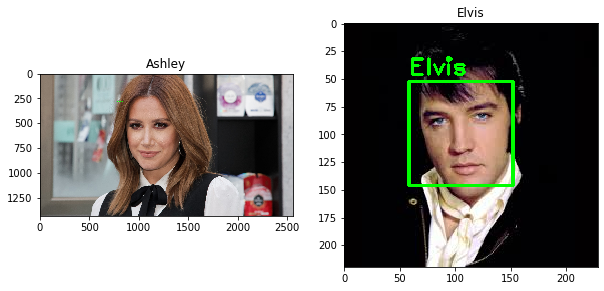

In [10]:
test1 = cv2.imread('test-data/test3.jpg')
test2 = cv2.imread('test-data/test2.jpg')

predict1,label1 = predict(test1)
predict2,label2 = predict(test2)
f, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_title(subjects[label1])
ax1.imshow(cv2.cvtColor(predict1, cv2.COLOR_BGR2RGB))
ax2.set_title(subjects[label2])
ax2.imshow(cv2.cvtColor(predict2, cv2.COLOR_BGR2RGB))